In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

c:\Users\irivyo\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'matplotlib.colors'

Task 1
Permutations and Combinations
Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

In [ ]:
# 12 cups of tea
pnum = (12*11*10*9*8*7)/(6*5*4*3*2*1)
pnum

924.0

In [ ]:
prob = (1/pnum)
prob

0.0010822510822510823

In [ ]:
#8 cups of teaa
pnum1 = (8*7*6*5)/(4*3*2*1)
pnum1

70.0

In [ ]:
prob1 = (1/pnum1)
prob1

0.014285714285714285

Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [ ]:
from scipy.stats import shapiro

In [ ]:
sample = np.random.normal(loc=10, scale=3, size = 10000)

In [ ]:
stat, p_value = shapiro(sample)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.9997830986976624
P-value: 0.4184521436691284


c:\Users\irivyo\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The sample appears to come from a normal distribution (fail to reject H0).")
else:
    print("The sample does not appear to come from a normal distribution (reject H0).")

The sample appears to come from a normal distribution (fail to reject H0).


<AxesSubplot:ylabel='Density'>

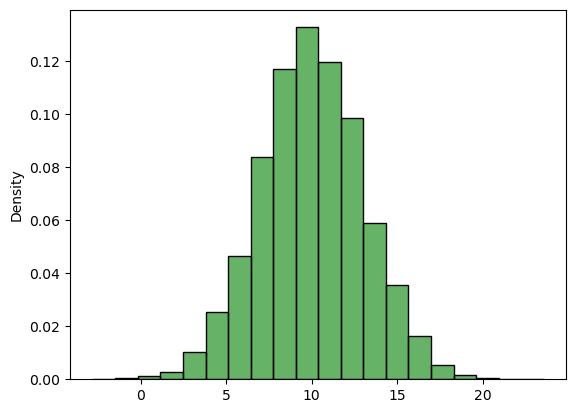

In [ ]:
sns.histplot(sample, bins=20,kde = False, stat="density", color='g', alpha=0.6)
#plt.hist(sample, bins=50, density=True, alpha=0.6, color='g')

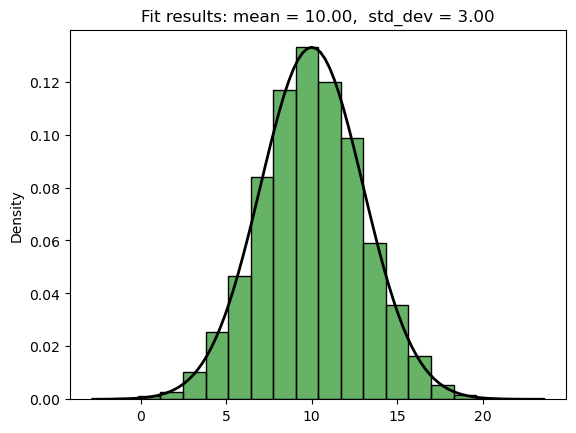

In [ ]:
sns.histplot(sample, bins=20,kde = False, stat="density", color='g', alpha=0.6)

# Plot the normal distribution probability density function (PDF)
mean = 10.0
std_dev = 3.0
x = np.linspace(min(sample), max(sample), 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  std_dev = %.2f" % (mean, std_dev)
plt.title(title)

# Show the plot
plt.show()


Task 3: t-Test Calculation
Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9
Before	63	68	70	64	74	67	70	57	66	65
After	64	64	68	64	73	70	72	54	61	63
Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

The t-statistic, also known as the t-value or Student’s t, is a measure derived from the t-distribution. It is used in hypothesis testing to determine whether to reject the null hypothesis

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
# Data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Calculate the t-statistic and p-value for the paired sample
t_statistic, p_value = ttest_rel(before, after)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 1.337227482480628
P-value: 0.21396011317404623


Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.